# Exploring Neuronal Connectivity Between the Hippocampus and Perirhinal Cortex using data from the Allen Mouse Brain Connectivity Atlas

The goal of this script it to compare projection density, i.e. the amount of GFP emitted from neurons in which it is expressed, between different regions of the mouse brain. eGFP-AAV tracer has been injected into neurons present in a particular region of interest, enabling the identification of different regions they may project to/from <sup>1</sup> . Here, we are interested in comparing projection densities between different subregions of the hippocampus and perirhinal cortex to investigate their connectivity. Much of the below code has been taken from the Mouse Connectivity Jupyter Notebook, which is available on the Allen Software Development Kit website and has been adapted to look at regions/experiments of interest (https://alleninstitute.github.io/AllenSDK/_static/examples/nb/mouse_connectivity.html)<sup>2</sup>. 

Cells containing code taken from this notebook<sup>2</sup> will be labelled with *****.

IMPORTANT UPDATE (09/01/2022): Interactive graphs produced using plotly do not show on Github. Code designed to present the figures as static PNGs does not appear to work to address this. Therefore, please use the following link to view my plotly figures in the script: https://nbviewer.org/github/GraceMR/data_science_assessment/blob/main/Assessment_script.ipynb

In [1]:
#*****
#The MouseConnectivityCache class initally downloaded all experimental data from the Allen SDK website.
#Experimental details were extracted from the dataset and converted into a dataframe.
#Details from the first five experiments have been visualised using .head().

from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache

mcc = MouseConnectivityCache(manifest_file='connectivity/mouse_connectivity_manifest.json')

all_experiments = mcc.get_experiments(dataframe=True)
print("%d total experiments" % len(all_experiments))
all_experiments.head()

2992 total experiments


gender         injection_structures  injection_volume  injection_x  \
id                                                                             
527712447      F  [502, 926, 1084, 484682470]          0.006655         9240   
301875966      M                   [574, 931]          0.105746         9170   
520336173      M     [1, 210, 491, 525, 1004]          0.025762         7810   
307160976      F                  [304325711]          0.013590         5580   
644250774      F                        [329]          0.006724         6990   

           injection_y  injection_z  product_id                 specimen_name  \
id                                                                              
527712447         3070         8990           5     Penk-IRES2-Cre-neo-249961   
301875966         6850         6200           5         Gabrr3-Cre_KC112-3467   
520336173         6550         6450           5            Hdc-Cre_IM1-204103   
307160976         7040         6270          31                  Cdh4-Cre-215   
644250774         2150         2130          36  A930038C07Rik-Tg1-Cre-347488   

             strain structure_abbrev  structure_id  \
id                                                   
527712447  C57BL/6J              SUB           502   
301875966  C57BL/6J               PG           931   
520336173      None              TMv             1   
307160976      None           retina     304325711   
644250774      None          SSp-bfd           329   

                                     structure_name        transgenic_line  \
id                                                                           
527712447                                 Subiculum     Penk-IRES2-Cre-neo   
301875966                              Pontine gray       Gabrr3-Cre_KC112   
520336173    Tuberomammillary nucleus, ventral part            Hdc-Cre_IM1   
307160976                                    retina             Cdh4-CreER   
644250774  Primary somatosensory area, barrel field  A930038C07Rik-Tg1-Cre   

           transgenic_line_id         id  primary_injection_structure  
id                                                                     
527712447         298725927.0  527712447                          502  
301875966         177838877.0  301875966                          574  
520336173         177839494.0  520336173                            1  
307160976         308603472.0  307160976                    304325711  
644250774         177838542.0  644250774                          329

In [2]:
#*****
#Pandas was imported, and the StructureTree function used to extract summaries of all regions from the original
#MouseConnectivityCache dataset.

import pandas as pd
structure_tree = mcc.get_structure_tree()
#E.g. extract data pertaining to the perirhinal area and Field CA1 of the hippocampus.
structures = structure_tree.get_structures_by_name(['Perirhinal area', 'Field CA1'])
pd.DataFrame(structures)

acronym  graph_id  graph_order   id             name  \
0    PERI         1          367  922  Perirhinal area   
1     CA1         1          457  382        Field CA1   

                               structure_id_path  \
0              [997, 8, 567, 688, 695, 315, 922]   
1  [997, 8, 567, 688, 695, 1089, 1080, 375, 382]   

                                   structure_set_ids     rgb_triplet  
0  [3, 112905828, 688152357, 691663206, 687527945...  [14, 150, 132]  
1  [112905828, 691663206, 688152359, 687527945, 1...  [126, 208, 75]

(Reference: Pandas<sup>3</sup>)

In [3]:
#*****
#We are only interested in subregions of the hippocampus and perirhinal cortex (and the entorhinal cortex,
#which connects the two). Confirmation that each subregion is present has been initially confirmed by extracting
#details of each using StructureTree (a 'class instance').

structures = structure_tree.get_structures_by_name(['Perirhinal area', 'Field CA1', 'Field CA2', 'Field CA3',
                                                   'Dentate gyrus', 'Entorhinal area, lateral part',
                                                   'Entorhinal area, medial part, dorsal zone', 'Subiculum'])
pd.DataFrame(structures)

acronym  graph_id  graph_order   id  \
0    PERI         1          367  922   
1     CA1         1          457  382   
2     CA2         1          462  423   
3     CA3         1          467  463   
4      DG         1          473  726   
5    ENTl         1          494  918   
6    ENTm         1          507  926   
7     SUB         1          535  502   

                                        name  \
0                            Perirhinal area   
1                                  Field CA1   
2                                  Field CA2   
3                                  Field CA3   
4                              Dentate gyrus   
5              Entorhinal area, lateral part   
6  Entorhinal area, medial part, dorsal zone   
7                                  Subiculum   

                               structure_id_path  \
0              [997, 8, 567, 688, 695, 315, 922]   
1  [997, 8, 567, 688, 695, 1089, 1080, 375, 382]   
2  [997, 8, 567, 688, 695, 1089, 1080, 375, 423]   
3  [997, 8, 567, 688, 695, 1089, 1080, 375, 463]   
4       [997, 8, 567, 688, 695, 1089, 1080, 726]   
5   [997, 8, 567, 688, 695, 1089, 822, 909, 918]   
6   [997, 8, 567, 688, 695, 1089, 822, 909, 926]   
7        [997, 8, 567, 688, 695, 1089, 822, 502]   

                                   structure_set_ids     rgb_triplet  
0  [3, 112905828, 688152357, 691663206, 687527945...  [14, 150, 132]  
1  [112905828, 691663206, 688152359, 687527945, 1...  [126, 208, 75]  
2  [112905828, 691663206, 688152359, 687527945, 1...  [126, 208, 75]  
3  [112905828, 691663206, 688152359, 687527945, 1...  [126, 208, 75]  
4  [3, 112905828, 691663206, 688152359, 687527945...  [126, 208, 75]  
5  [112905828, 691663206, 688152359, 687527945, 1...   [50, 184, 37]  
6  [112905828, 691663206, 688152359, 687527945, 1...   [50, 184, 37]  
7  [112905828, 691663206, 688152359, 687527945, 1...   [79, 194, 68]

The hippocampus proper comprises Fields CA1, CA2 and CA3. The subiculum and dentate gyrus are part of the hippocampal formation and contribute to appropriate functioning of the hippocampus proper. 

### 1) Lateral Entorhinal Cortex Experiments

In [4]:
#*****
#As we want to assess connectivity between subregions via the entorhinal cortex, we are only interested in 
#assessing projection densities yielded from injection of eGFP-labelled AAV tracer into the entorhinal cortex.
#Details for experiments in which tracer was injected into the lateral entorhinal cortex were extracted.

entl = structure_tree.get_structures_by_acronym(['ENTl'])[0]
perirhinal_area = structure_tree.get_structures_by_acronym(['PERI'])[0]
field_ca1 = structure_tree.get_structures_by_acronym(['CA1'])[0]
field_ca2 = structure_tree.get_structures_by_acronym(['CA2'])[0]
field_ca3 = structure_tree.get_structures_by_acronym(['CA3'])[0]
dentate_gyrus = structure_tree.get_structures_by_acronym(['DG'])[0]
subiculum = structure_tree.get_structures_by_acronym(['SUB'])[0]
entl_experiments = mcc.get_experiments(cre=False, 
                                       injection_structure_ids=[entl['id']])

#Projection densities only in the subregions of interest were subsequently isolated, and experimental details yielding these projection
#densities stored in the structure_unionizes dataframe.

print("%d  ENTl experiments" % len(entl_experiments)) #Gives total number of experiments in which injections were made into the lateral entorhinal cortex.
structure_unionizes = mcc.get_structure_unionizes([ e['id'] for e in entl_experiments], 
                                                  is_injection=False, #(this means measurements -e.g. projection density- for the region which was injected will not be included)
                                                  structure_ids=[perirhinal_area ['id'], field_ca1['id'],
                                                                field_ca2['id'], field_ca3['id'], dentate_gyrus['id'],
                                                                subiculum['id']], 
                                                  include_descendants=True)

print("%d subregions of interest with projection densities" % len(structure_unionizes)) #This number will be high due
#to subregions being measured in different brain hemispheres per mouse.


10  ENTl experiments
420 subregions of interest with projection densities


In [5]:
#Assess experimental details present in the dataframe.
structure_unionizes.head()

experiment_id  hemisphere_id         id  is_injection  max_voxel_density  \
0      142656218              2  633712304         False           1.000000   
1      142656218              1  633712829         False           0.375773   
2      142656218              2  633711957         False           1.000000   
3      142656218              3  633714590         False           0.508170   
4      142656218              3  633714209         False           1.000000   

   max_voxel_x  max_voxel_y  max_voxel_z  normalized_projection_volume  \
0         9400         3610        10230                      0.341189   
1         7910         4720          870                      0.011183   
2         8740         4150        10020                      0.035483   
3         7800         2460         7540                      0.008589   
4         9150         3940        10030                      0.115028   

   projection_density  projection_energy  projection_intensity  \
0            0.250781         499.206360           1990.606445   
1            0.008218           2.748356            334.447327   
2            0.721776        2167.735352           3003.334717   
3            0.000655           0.339276            517.867877   
4            0.269376         810.339021           3008.206884   

   projection_volume  structure_id  sum_pixel_intensity    sum_pixels  \
0           0.046040           888         9.616073e+10  1.498663e+08   
1           0.001509           888         1.306722e+10  1.498995e+08   
2           0.004788           368         1.240262e+10  5.415250e+06   
3           0.001159           632         8.063663e+10  1.444086e+09   
4           0.015522           335         4.415748e+10  4.703802e+07   

   sum_projection_pixel_intensity  sum_projection_pixels    volume  
0                    7.481422e+10           3.758363e+07  0.183586  
1                    4.119772e+08           1.231815e+06  0.183627  
2                    1.173883e+10           3.908598e+06  0.006634  
3                    4.899441e+08           9.460793e+05  1.769005  
4                    3.811674e+10           1.267092e+07  0.057622

In [6]:
#*****
#Although numeric structure IDs are provided in this dataframe, subregion names would be preferable for graphing purposes. 
#Subregion names were identified based on structure ID using StructureTree, and stored in a separate dataframe
#(structure_unionizes3).

structure_unionizes2 = pd.DataFrame(structure_tree.nodes(structure_unionizes.structure_id))
structure_unionizes3 = pd.DataFrame(structure_unionizes2.name)
structure_unionizes3

name
0           Perirhinal area, layer 2/3
1           Perirhinal area, layer 2/3
2            Perirhinal area, layer 6b
3    Dentate gyrus, granule cell layer
4            Perirhinal area, layer 6a
..                                 ...
415     Dentate gyrus, molecular layer
416     Dentate gyrus, molecular layer
417                          Field CA2
418                          Subiculum
419           Perirhinal area, layer 1

[420 rows x 1 columns]

In [7]:
#The subregion names dataframe has been converted to a list and appended to the original structure_unionizes
#dataframe.

structure_unionizes3.values.tolist() 
structure_unionizes['name'] = structure_unionizes3
structure_unionizes.head()

experiment_id  hemisphere_id         id  is_injection  max_voxel_density  \
0      142656218              2  633712304         False           1.000000   
1      142656218              1  633712829         False           0.375773   
2      142656218              2  633711957         False           1.000000   
3      142656218              3  633714590         False           0.508170   
4      142656218              3  633714209         False           1.000000   

   max_voxel_x  max_voxel_y  max_voxel_z  normalized_projection_volume  \
0         9400         3610        10230                      0.341189   
1         7910         4720          870                      0.011183   
2         8740         4150        10020                      0.035483   
3         7800         2460         7540                      0.008589   
4         9150         3940        10030                      0.115028   

   projection_density  projection_energy  projection_intensity  \
0            0.250781         499.206360           1990.606445   
1            0.008218           2.748356            334.447327   
2            0.721776        2167.735352           3003.334717   
3            0.000655           0.339276            517.867877   
4            0.269376         810.339021           3008.206884   

   projection_volume  structure_id  sum_pixel_intensity    sum_pixels  \
0           0.046040           888         9.616073e+10  1.498663e+08   
1           0.001509           888         1.306722e+10  1.498995e+08   
2           0.004788           368         1.240262e+10  5.415250e+06   
3           0.001159           632         8.063663e+10  1.444086e+09   
4           0.015522           335         4.415748e+10  4.703802e+07   

   sum_projection_pixel_intensity  sum_projection_pixels    volume  \
0                    7.481422e+10           3.758363e+07  0.183586   
1                    4.119772e+08           1.231815e+06  0.183627   
2                    1.173883e+10           3.908598e+06  0.006634   
3                    4.899441e+08           9.460793e+05  1.769005   
4                    3.811674e+10           1.267092e+07  0.057622   

                                name  
0         Perirhinal area, layer 2/3  
1         Perirhinal area, layer 2/3  
2          Perirhinal area, layer 6b  
3  Dentate gyrus, granule cell layer  
4          Perirhinal area, layer 6a

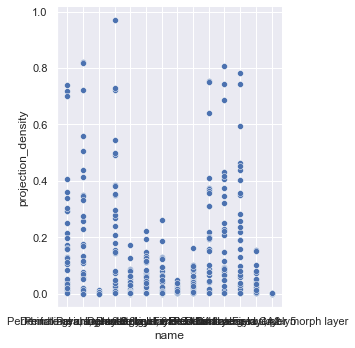

In [8]:
#Projection densities of different subregions were subsequently plotted.

import seaborn as sns
cmap = sns.diverging_palette (10,220, as_cmap = True)
sns.set_theme()
chart = sns.relplot(data = structure_unionizes, x = "name", y = "projection_density")

(Reference: Seaborn<sup>4</sup>)

This plot is not very useful, as subregion names are illegible and it's currently not possible to discriminate between subregions belonging to different brain areas.

In [9]:
#A new column was defined to sort subregions into their appropriate brain area.

def region (column):
   if column['name'] == "Dentate gyrus" :
      return 'DG'
   if column['name'] == "Dentate gyrus, granule cell layer" :
      return 'DG'
   if column['name'] == "Dentate gyrus, molecular layer" :
      return 'DG'
   if column['name'] == "Dentate gyrus, polymorph layer" :
      return 'DG'
   if column['name'] == "Field CA1" :
      return 'HIPP'
   if column['name'] == "Field CA2" :
      return 'HIPP'
   if column['name'] == "Field CA3" :
      return 'HIPP'
   if column['name'] == "Perirhinal area" :
      return 'PERI'
   if column['name'] == "Perirhinal area, layer 1" :
      return 'PERI'
   if column['name'] == "Perirhinal area, layer 2/3" :
      return 'PERI'
   if column['name'] == "Perirhinal area, layer 5" :
      return 'PERI'
   if column['name'] == "Perirhinal area, layer 6a" :
      return 'PERI'
   if column['name'] == "Perirhinal area, layer 6b" :
      return 'PERI'
   if column['name'] == "Subiculum" :
      return 'SUB'

In [10]:
#The structure of this column (or series) was assessed.

structure_unionizes.apply (lambda row: region(row), axis=1)

0      PERI
1      PERI
2      PERI
3        DG
4      PERI
       ... 
415      DG
416      DG
417    HIPP
418     SUB
419    PERI
Length: 420, dtype: object

In [11]:
#This series was then appended to the original structure_unionizes dataframe.

structure_unionizes['region'] = structure_unionizes.apply (lambda row: region(row), axis=1)
structure_unionizes.head()

#(It should be noted that cells [9], [10] and [11] were written using: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o)

experiment_id  hemisphere_id         id  is_injection  max_voxel_density  \
0      142656218              2  633712304         False           1.000000   
1      142656218              1  633712829         False           0.375773   
2      142656218              2  633711957         False           1.000000   
3      142656218              3  633714590         False           0.508170   
4      142656218              3  633714209         False           1.000000   

   max_voxel_x  max_voxel_y  max_voxel_z  normalized_projection_volume  \
0         9400         3610        10230                      0.341189   
1         7910         4720          870                      0.011183   
2         8740         4150        10020                      0.035483   
3         7800         2460         7540                      0.008589   
4         9150         3940        10030                      0.115028   

   projection_density  ...  projection_intensity  projection_volume  \
0            0.250781  ...           1990.606445           0.046040   
1            0.008218  ...            334.447327           0.001509   
2            0.721776  ...           3003.334717           0.004788   
3            0.000655  ...            517.867877           0.001159   
4            0.269376  ...           3008.206884           0.015522   

   structure_id  sum_pixel_intensity    sum_pixels  \
0           888         9.616073e+10  1.498663e+08   
1           888         1.306722e+10  1.498995e+08   
2           368         1.240262e+10  5.415250e+06   
3           632         8.063663e+10  1.444086e+09   
4           335         4.415748e+10  4.703802e+07   

   sum_projection_pixel_intensity  sum_projection_pixels    volume  \
0                    7.481422e+10           3.758363e+07  0.183586   
1                    4.119772e+08           1.231815e+06  0.183627   
2                    1.173883e+10           3.908598e+06  0.006634   
3                    4.899441e+08           9.460793e+05  1.769005   
4                    3.811674e+10           1.267092e+07  0.057622   

                                name region  
0         Perirhinal area, layer 2/3   PERI  
1         Perirhinal area, layer 2/3   PERI  
2          Perirhinal area, layer 6b   PERI  
3  Dentate gyrus, granule cell layer     DG  
4          Perirhinal area, layer 6a   PERI  

[5 rows x 21 columns]

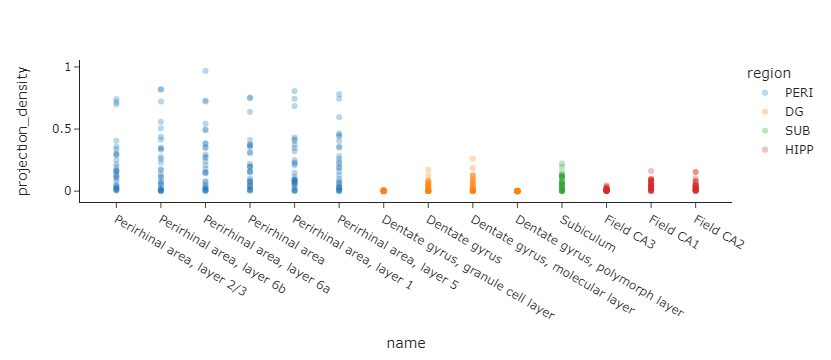

In [12]:
#A new and improved figure of projection density was plotted using the Plotly Express module. Each subregion was grouped and coloured according to overarching region,
#and opacity of points reduced to better visualise them.

import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(structure_unionizes, x="name", y="projection_density", color="region", template="simple_white", opacity = 0.3)
fig.show()

(Reference: plotly<sup>5</sup>)

This is better, although there is room for improvement (i.e. appropriate ordering of subregions, addition of units to projection density etc.). It is not possible to add the mean and error bars to scatterplots generated using plotly, so projection density means and standard errors for each subregion will be calculated and used to produce new plots.  

In [13]:
#The original structure_unionizes dataframe was grouped into subregions. The means for each measurement taken
#for each subregion was then calculated.

grouped_df = structure_unionizes.groupby("name")
mean_df = grouped_df.mean()
mean_df = mean_df.reset_index()
print(mean_df)

                                 name  experiment_id  hemisphere_id  \
0                       Dentate gyrus    253561156.0            2.0   
1   Dentate gyrus, granule cell layer    253561156.0            2.0   
2      Dentate gyrus, molecular layer    253561156.0            2.0   
3      Dentate gyrus, polymorph layer    253561156.0            2.0   
4                           Field CA1    253561156.0            2.0   
5                           Field CA2    253561156.0            2.0   
6                           Field CA3    253561156.0            2.0   
7                     Perirhinal area    253561156.0            2.0   
8            Perirhinal area, layer 1    253561156.0            2.0   
9          Perirhinal area, layer 2/3    253561156.0            2.0   
10           Perirhinal area, layer 5    253561156.0            2.0   
11          Perirhinal area, layer 6a    253561156.0            2.0   
12          Perirhinal area, layer 6b    253561156.0            2.0   
13    

In [14]:
#For graphing purposes, the above means were added to the original structure_unionizes dataframe as a new column.

def subregion_mean (column): 
   if column['name'] == "Dentate gyrus" :
      return 0.034331
   if column['name'] == "Dentate gyrus, granule cell layer" :
      return 0.001865
   if column['name'] == "Dentate gyrus, molecular layer" :
      return 0.051809
   if column['name'] == "Dentate gyrus, polymorph layer" :
      return 0.000540 
   if column['name'] == "Field CA1" :
      return 0.049695
   if column['name'] == "Field CA2" :
      return 0.040120
   if column['name'] == "Field CA3" :
      return 0.012469 
   if column['name'] == "Perirhinal area" :
      return 0.217003
   if column['name'] == "Perirhinal area, layer 1" :
      return 0.216578
   if column['name'] == "Perirhinal area, layer 2/3" :
      return 0.207856 
   if column['name'] == "Perirhinal area, layer 5" :
      return 0.223700
   if column['name'] == "Perirhinal area, layer 6a" :
      return 0.255326
   if column['name'] == "Perirhinal area, layer 6b" :
      return 0.236557
   if column['name'] == "Subiculum" :
      return 0.069993 

In [15]:
structure_unionizes.apply (lambda row: subregion_mean(row), axis=1)

0      0.207856
1      0.207856
2      0.236557
3      0.001865
4      0.255326
         ...   
415    0.051809
416    0.051809
417    0.040120
418    0.069993
419    0.216578
Length: 420, dtype: float64

In [16]:
structure_unionizes['subregion_mean'] = structure_unionizes.apply (lambda row: subregion_mean(row), axis=1)
structure_unionizes.head()

experiment_id  hemisphere_id         id  is_injection  max_voxel_density  \
0      142656218              2  633712304         False           1.000000   
1      142656218              1  633712829         False           0.375773   
2      142656218              2  633711957         False           1.000000   
3      142656218              3  633714590         False           0.508170   
4      142656218              3  633714209         False           1.000000   

   max_voxel_x  max_voxel_y  max_voxel_z  normalized_projection_volume  \
0         9400         3610        10230                      0.341189   
1         7910         4720          870                      0.011183   
2         8740         4150        10020                      0.035483   
3         7800         2460         7540                      0.008589   
4         9150         3940        10030                      0.115028   

   projection_density  ...  projection_volume  structure_id  \
0            0.250781  ...           0.046040           888   
1            0.008218  ...           0.001509           888   
2            0.721776  ...           0.004788           368   
3            0.000655  ...           0.001159           632   
4            0.269376  ...           0.015522           335   

   sum_pixel_intensity    sum_pixels  sum_projection_pixel_intensity  \
0         9.616073e+10  1.498663e+08                    7.481422e+10   
1         1.306722e+10  1.498995e+08                    4.119772e+08   
2         1.240262e+10  5.415250e+06                    1.173883e+10   
3         8.063663e+10  1.444086e+09                    4.899441e+08   
4         4.415748e+10  4.703802e+07                    3.811674e+10   

   sum_projection_pixels    volume                               name  region  \
0           3.758363e+07  0.183586         Perirhinal area, layer 2/3    PERI   
1           1.231815e+06  0.183627         Perirhinal area, layer 2/3    PERI   
2           3.908598e+06  0.006634          Perirhinal area, layer 6b    PERI   
3           9.460793e+05  1.769005  Dentate gyrus, granule cell layer      DG   
4           1.267092e+07  0.057622          Perirhinal area, layer 6a    PERI   

  subregion_mean  
0       0.207856  
1       0.207856  
2       0.236557  
3       0.001865  
4       0.255326  

[5 rows x 22 columns]

In [17]:
#Similarly, standard errors were calculated and added to the dataframe as a new column.
grouped_df2 = structure_unionizes.groupby("name")
sem_df = grouped_df2.sem() 
sem_df = sem_df.reset_index()
sem_df

name  experiment_id  hemisphere_id  \
0                       Dentate gyrus   3.687418e+07        0.15162   
1   Dentate gyrus, granule cell layer   3.687418e+07        0.15162   
2      Dentate gyrus, molecular layer   3.687418e+07        0.15162   
3      Dentate gyrus, polymorph layer   3.687418e+07        0.15162   
4                           Field CA1   3.687418e+07        0.15162   
5                           Field CA2   3.687418e+07        0.15162   
6                           Field CA3   3.687418e+07        0.15162   
7                     Perirhinal area   3.687418e+07        0.15162   
8            Perirhinal area, layer 1   3.687418e+07        0.15162   
9          Perirhinal area, layer 2/3   3.687418e+07        0.15162   
10           Perirhinal area, layer 5   3.687418e+07        0.15162   
11          Perirhinal area, layer 6a   3.687418e+07        0.15162   
12          Perirhinal area, layer 6b   3.687418e+07        0.15162   
13                          Subiculum   3.687418e+07        0.15162   

              id  is_injection  max_voxel_density  max_voxel_x  max_voxel_y  \
0   1.594780e+06           0.0           0.043618   160.599082   192.334359   
1   1.594780e+06           0.0           0.043491   184.150072   151.656511   
2   1.594771e+06           0.0           0.043618   160.369891   174.023868   
3   1.594771e+06           0.0           0.039909   473.346288   250.889605   
4   1.594781e+06           0.0           0.028435   145.569630   180.916240   
5   1.594780e+06           0.0           0.038065   103.126619   128.870067   
6   1.594780e+06           0.0           0.033287   130.022235   122.811821   
7   1.594776e+06           0.0           0.037240   113.672599    84.682888   
8   1.594781e+06           0.0           0.042476   119.807061    81.275653   
9   1.594777e+06           0.0           0.043812   108.862122    78.164994   
10  1.594780e+06           0.0           0.048435   100.456811    70.522516   
11  1.594782e+06           0.0           0.053815    90.365986    65.285726   
12  1.594782e+06           0.0           0.063573    58.379161    48.935175   
13  1.594781e+06           0.0           0.039490    99.961314   171.434515   

    max_voxel_z  normalized_projection_volume  ...  projection_energy  \
0    391.553097                      0.135005  ...          32.785663   
1    308.229085                      0.001681  ...           0.787842   
2    399.862931                      0.133710  ...          50.013738   
3    511.717119                      0.000246  ...           0.107089   
4    448.273162                      0.224978  ...          21.803443   
5    456.471709                      0.008970  ...          35.594539   
6    374.745732                      0.030121  ...           6.954919   
7    818.826936                      0.077789  ...         166.044447   
8    841.866930                      0.023524  ...         199.018091   
9    828.153603                      0.029317  ...         156.827210   
10   782.831067                      0.018753  ...         175.784974   
11   758.045048                      0.007552  ...         206.045389   
12   745.933856                      0.002110  ...         270.711957   
13   478.690727                      0.087357  ...          36.386865   

    projection_intensity  projection_volume  structure_id  \
0             246.349719           0.034434           0.0   
1              89.093806           0.000542           0.0   
2             249.174364           0.033992           0.0   
3              80.433346           0.000069           0.0   
4             233.739388           0.049900           0.0   
5             257.923856           0.002430           0.0   
6             210.805958           0.008909           0.0   
7             289.032134           0.019589           0.0   
8             310.147553           0.006192           0.0   
9             254.921227           0.007887           0.0   
10            

In [18]:
#To quickly see the SEMs (as they appear to have been compressed in the above dataframe), this column was converted to a list. 

projection_density_list = sem_df['projection_density'].tolist()
print(projection_density_list)

[0.0077323682395803155, 0.0004945248330342541, 0.011691718223885395, 0.00014422052919256878, 0.007077559671944321, 0.007443500768434952, 0.002021083370742144, 0.038686107177948945, 0.04088867735286396, 0.037942850905357206, 0.04062158607542216, 0.04562838857338801, 0.045245202989064315, 0.010905017028600061]


In [19]:
#For graphing purposes, the above SEMs were added to the original structure_unionizes dataframe as a new column.

def subregion_sem (column): 
   if column['name'] == "Dentate gyrus" :
      return 0.0077323682395803155
   if column['name'] == "Dentate gyrus, granule cell layer" :
      return 0.0004945248330342541
   if column['name'] == "Dentate gyrus, molecular layer" :
      return 0.011691718223885395
   if column['name'] == "Dentate gyrus, polymorph layer" :
      return 0.00014422052919256878 
   if column['name'] == "Field CA1" :
      return 0.007077559671944321
   if column['name'] == "Field CA2" :
      return 0.007443500768434952
   if column['name'] == "Field CA3" :
      return 0.002021083370742144
   if column['name'] == "Perirhinal area" :
      return 0.038686107177948945
   if column['name'] == "Perirhinal area, layer 1" :
      return 0.04088867735286396
   if column['name'] == "Perirhinal area, layer 2/3" :
      return 0.037942850905357206
   if column['name'] == "Perirhinal area, layer 5" :
      return 0.04062158607542216
   if column['name'] == "Perirhinal area, layer 6a" :
      return 0.04562838857338801
   if column['name'] == "Perirhinal area, layer 6b" :
      return 0.045245202989064315
   if column['name'] == "Subiculum" :
      return 0.010905017028600061

In [20]:
structure_unionizes.apply (lambda row: subregion_sem(row), axis=1)

0      0.037943
1      0.037943
2      0.045245
3      0.000495
4      0.045628
         ...   
415    0.011692
416    0.011692
417    0.007444
418    0.010905
419    0.040889
Length: 420, dtype: float64

In [21]:
structure_unionizes['subregion_sem'] = structure_unionizes.apply (lambda row: subregion_sem(row), axis=1)
structure_unionizes.head()

experiment_id  hemisphere_id         id  is_injection  max_voxel_density  \
0      142656218              2  633712304         False           1.000000   
1      142656218              1  633712829         False           0.375773   
2      142656218              2  633711957         False           1.000000   
3      142656218              3  633714590         False           0.508170   
4      142656218              3  633714209         False           1.000000   

   max_voxel_x  max_voxel_y  max_voxel_z  normalized_projection_volume  \
0         9400         3610        10230                      0.341189   
1         7910         4720          870                      0.011183   
2         8740         4150        10020                      0.035483   
3         7800         2460         7540                      0.008589   
4         9150         3940        10030                      0.115028   

   projection_density  ...  structure_id  sum_pixel_intensity    sum_pixels  \
0            0.250781  ...           888         9.616073e+10  1.498663e+08   
1            0.008218  ...           888         1.306722e+10  1.498995e+08   
2            0.721776  ...           368         1.240262e+10  5.415250e+06   
3            0.000655  ...           632         8.063663e+10  1.444086e+09   
4            0.269376  ...           335         4.415748e+10  4.703802e+07   

   sum_projection_pixel_intensity  sum_projection_pixels    volume  \
0                    7.481422e+10           3.758363e+07  0.183586   
1                    4.119772e+08           1.231815e+06  0.183627   
2                    1.173883e+10           3.908598e+06  0.006634   
3                    4.899441e+08           9.460793e+05  1.769005   
4                    3.811674e+10           1.267092e+07  0.057622   

                                name  region  subregion_mean subregion_sem  
0         Perirhinal area, layer 2/3    PERI        0.207856      0.037943  
1         Perirhinal area, layer 2/3    PERI        0.207856      0.037943  
2          Perirhinal area, layer 6b    PERI        0.236557      0.045245  
3  Dentate gyrus, granule cell layer      DG        0.001865      0.000495  
4          Perirhinal area, layer 6a    PERI        0.255326      0.045628  

[5 rows x 23 columns]

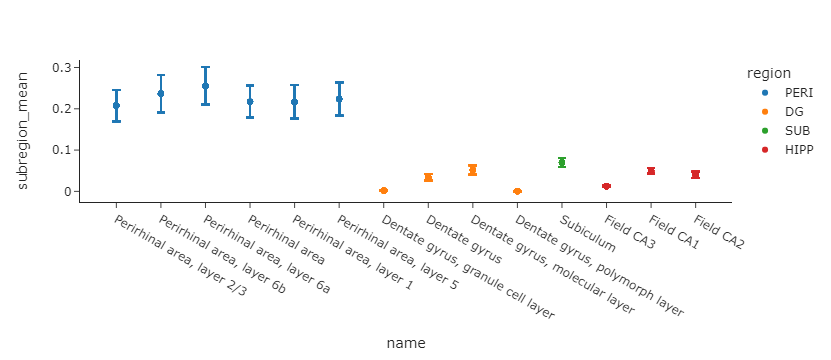

In [22]:
fig2 = px.scatter(structure_unionizes, x="name", y="subregion_mean", color="region", template="simple_white",
                 error_y = "subregion_sem")
fig2.show()

In [23]:
#In the interest of further investigation, the relationship between all measurements taken for each of the experiments of interest
#-including projection density- was assessed. Certain measurements were initially converted to categorical variables
#where appropriate.
structure_unionizes.experiment_id = structure_unionizes.experiment_id.astype('category')
structure_unionizes.hemisphere_id = structure_unionizes.hemisphere_id.astype('category')
structure_unionizes.structure_id = structure_unionizes.structure_id.astype('category')
structure_unionizes.id = structure_unionizes.id.astype('category')
structure_unionizes.is_injection = structure_unionizes.is_injection.astype('category')

In [24]:
#Correlations between measurments in the dataframe were measured.
corr = structure_unionizes.corr()

In [25]:
cmap = sns.diverging_palette (10,220, as_cmap = True)

<AxesSubplot:>

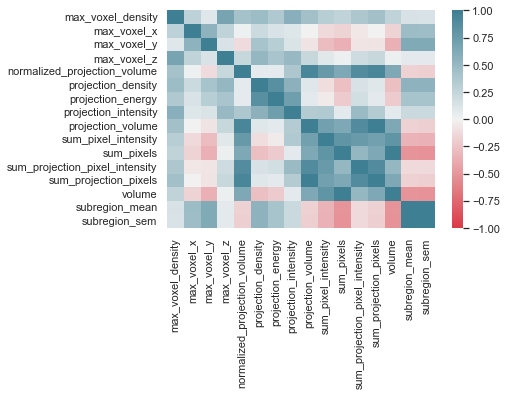

In [26]:
sns.heatmap(corr, vmin = -1.0, vmax = 1.0, cmap = cmap)

This seems to suggest that the highest correlations are between projection_volume and sum_projection_pixels, and sum_pixels and volume. To further assess correlation between measured variables according to brain region, scatterplots were produced. 

In [27]:
#Due to issues associated with colouring scatter_matrix points according to brain region, a new column was produced
#to assign each region a colour based on a number.
def region2 (column):
   if column['name'] == "Dentate gyrus" :
      return 0
   if column['name'] == "Dentate gyrus, granule cell layer" :
      return 0
   if column['name'] == "Dentate gyrus, molecular layer" :
      return 0
   if column['name'] == "Dentate gyrus, polymorph layer" :
      return 0
   if column['name'] == "Field CA1" :
      return 1
   if column['name'] == "Field CA2" :
      return 1
   if column['name'] == "Field CA3" :
      return 1
   if column['name'] == "Perirhinal area" :
      return 2
   if column['name'] == "Perirhinal area, layer 1" :
      return 2
   if column['name'] == "Perirhinal area, layer 2/3" :
      return 2
   if column['name'] == "Perirhinal area, layer 5" :
      return 2
   if column['name'] == "Perirhinal area, layer 6a" :
      return 2
   if column['name'] == "Perirhinal area, layer 6b" :
      return 2
   if column['name'] == "Subiculum" :
      return 3

In [28]:
REGION = structure_unionizes.apply (lambda row: region2(row), axis=1)
REGION

0      2
1      2
2      2
3      0
4      2
      ..
415    0
416    0
417    1
418    3
419    2
Length: 420, dtype: int64

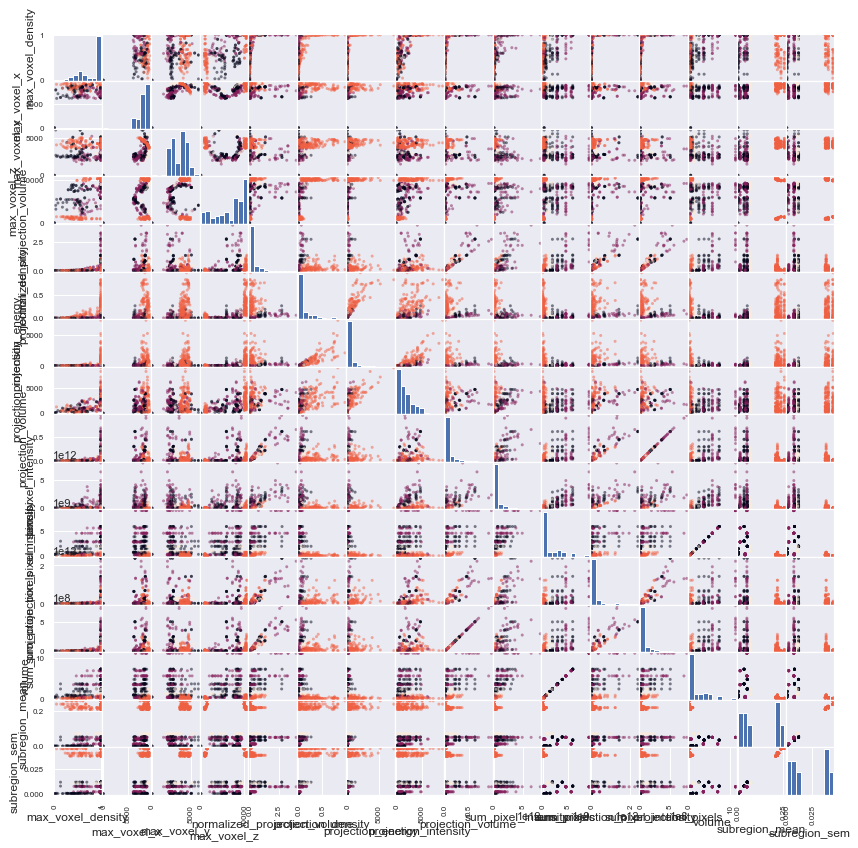

In [29]:
from pandas.plotting import scatter_matrix
a = scatter_matrix(structure_unionizes, figsize=(14, 14), c = REGION)

At first glance, the perirhinal region, hippocampus proper, dentate gyrus and subiculum did not seem to be defined by correlations between variables. I.e. there was no obvious clustering of data according to region. Projection_intensity and sum_pixel_intensity did seem to produce slight clustering- to look at this a little more closely, a scatter plot was generated.

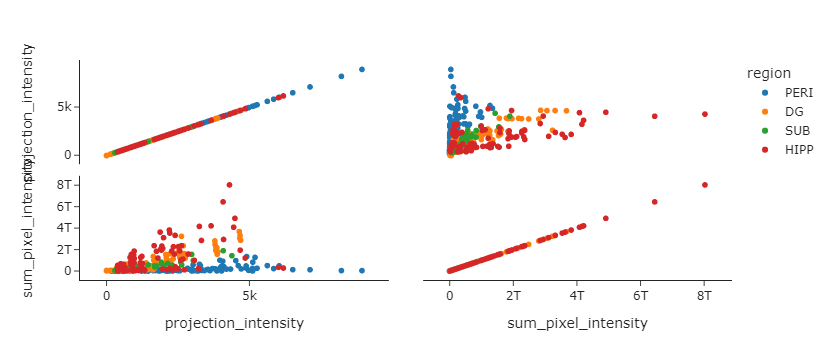

In [30]:
fig3 = px.scatter_matrix(structure_unionizes, dimensions=["projection_intensity", "sum_pixel_intensity"], color="region", template="simple_white")
fig3.show()

As there was no clear clustering, it can be said that no correlation exists between any of the measured variables according to brain region.

### 2) Field CA3 Experiments

To provide a comparison for the data obtained from experiments in which tracer was injected into the lateral entorhinal cortex, data from experiments in which Field CA3 of the hippocampus proper was injected with tracer were similarly investigated. 

In [31]:
#*****
CA3 = structure_tree.get_structures_by_acronym(['CA3'])[0]
CA3_experiments = mcc.get_experiments(cre=False, 
                                       injection_structure_ids=[CA3['id']])

print("%d  CA3" % len(CA3_experiments))
structure_unionizes4 = mcc.get_structure_unionizes([ e['id'] for e in CA3_experiments ], 
                                                  is_injection=False,
                                                  structure_ids=[perirhinal_area['id'], field_ca1['id'],
                                                                field_ca2['id'], dentate_gyrus['id'],
                                                                subiculum['id']], 
                                                  include_descendants=True)

print("%d Structures with projection densities" % len(structure_unionizes4))

8  CA3
312 Structures with projection densities


In [32]:
#*****
structure_unionizes5 = pd.DataFrame(structure_tree.nodes(structure_unionizes4.structure_id))
structure_unionizes6 = pd.DataFrame(structure_unionizes5.name)
structure_unionizes6

name
0        Perirhinal area, layer 2/3
1          Perirhinal area, layer 1
2    Dentate gyrus, molecular layer
3                         Field CA2
4         Perirhinal area, layer 6a
..                              ...
307                   Dentate gyrus
308       Perirhinal area, layer 6b
309      Perirhinal area, layer 2/3
310                       Subiculum
311                 Perirhinal area

[312 rows x 1 columns]

In [33]:
structure_unionizes6.values.tolist()
structure_unionizes4['name'] = structure_unionizes6
structure_unionizes4.head()

experiment_id  hemisphere_id         id  is_injection  max_voxel_density  \
0      272404772              1  631418607         False           0.000000   
1      272404772              1  631418841         False           0.153352   
2      272404772              1  631418237         False           0.457998   
3      272404772              1  631418904         False           1.000000   
4      272404772              1  631418960         False           0.000000   

   max_voxel_x  max_voxel_y  max_voxel_z  normalized_projection_volume  \
0            0            0            0                      0.000000   
1         9020         4050          810                      0.000258   
2         8040         6150         4190                      0.008038   
3         7010         2150         3210                      0.199386   
4            0            0            0                      0.000000   

   projection_density  projection_energy  projection_intensity  \
0            0.000000           0.000000              0.000000   
1            0.000319           0.049260            154.304749   
2            0.000512           0.257535            503.313995   
3            0.114856         634.343201           5522.946289   
4            0.000000           0.000000              0.000000   

   projection_volume  structure_id  sum_pixel_intensity    sum_pixels  \
0           0.000000           888         4.777793e+10  1.498995e+08   
1           0.000039           540         2.971033e+10  9.956970e+07   
2           0.001215         10703         8.139185e+11  1.937989e+09   
3           0.030133           423         2.602029e+11  2.141685e+08   
4           0.000000           335         8.135957e+09  2.425230e+07   

   sum_projection_pixel_intensity  sum_projection_pixels    volume  \
0                    0.000000e+00           0.000000e+00  0.183627   
1                    4.904790e+06           3.178639e+04  0.121973   
2                    4.990992e+08           9.916260e+05  2.374036   
3                    1.358563e+11           2.459852e+07  0.262356   
4                    0.000000e+00           0.000000e+00  0.029709   

                             name  
0      Perirhinal area, layer 2/3  
1        Perirhinal area, layer 1  
2  Dentate gyrus, molecular layer  
3                       Field CA2  
4       Perirhinal area, layer 6a

In [34]:
structure_unionizes4['region'] = structure_unionizes4.apply (lambda row: region(row), axis=1)
structure_unionizes4.head()

experiment_id  hemisphere_id         id  is_injection  max_voxel_density  \
0      272404772              1  631418607         False           0.000000   
1      272404772              1  631418841         False           0.153352   
2      272404772              1  631418237         False           0.457998   
3      272404772              1  631418904         False           1.000000   
4      272404772              1  631418960         False           0.000000   

   max_voxel_x  max_voxel_y  max_voxel_z  normalized_projection_volume  \
0            0            0            0                      0.000000   
1         9020         4050          810                      0.000258   
2         8040         6150         4190                      0.008038   
3         7010         2150         3210                      0.199386   
4            0            0            0                      0.000000   

   projection_density  ...  projection_intensity  projection_volume  \
0            0.000000  ...              0.000000           0.000000   
1            0.000319  ...            154.304749           0.000039   
2            0.000512  ...            503.313995           0.001215   
3            0.114856  ...           5522.946289           0.030133   
4            0.000000  ...              0.000000           0.000000   

   structure_id  sum_pixel_intensity    sum_pixels  \
0           888         4.777793e+10  1.498995e+08   
1           540         2.971033e+10  9.956970e+07   
2         10703         8.139185e+11  1.937989e+09   
3           423         2.602029e+11  2.141685e+08   
4           335         8.135957e+09  2.425230e+07   

   sum_projection_pixel_intensity  sum_projection_pixels    volume  \
0                    0.000000e+00           0.000000e+00  0.183627   
1                    4.904790e+06           3.178639e+04  0.121973   
2                    4.990992e+08           9.916260e+05  2.374036   
3                    1.358563e+11           2.459852e+07  0.262356   
4                    0.000000e+00           0.000000e+00  0.029709   

                             name region  
0      Perirhinal area, layer 2/3   PERI  
1        Perirhinal area, layer 1   PERI  
2  Dentate gyrus, molecular layer     DG  
3                       Field CA2   HIPP  
4       Perirhinal area, layer 6a   PERI  

[5 rows x 21 columns]

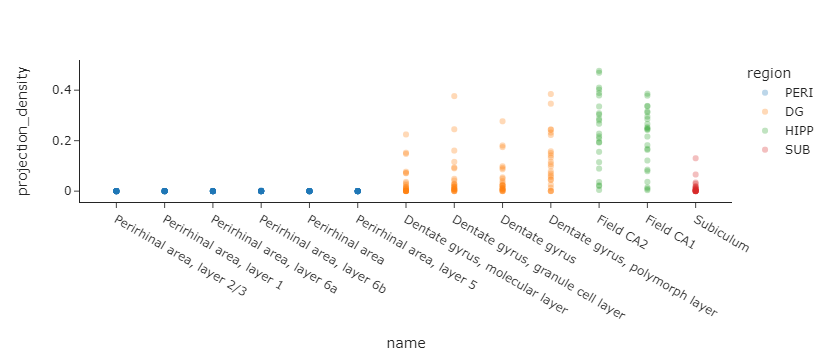

In [35]:
fig4 = px.scatter(structure_unionizes4, x="name", y="projection_density", color="region", template="simple_white", opacity = 0.3)
fig4.show()

As expected, there appear to be no projection densities in the perirhinal area, suggesting zero direct neuronal connections between this region and CA3 field. Comparartively, projection densities are high in other hippocampal subregions, confirming strong connectivity within the hippocampus.

In [36]:
#Now for calculation of subregion means.
grouped_df3 = structure_unionizes4.groupby("name")
mean_df3 = grouped_df3.mean()
mean_df3 = mean_df3.reset_index()
print(mean_df3)

                                 name  experiment_id  hemisphere_id  \
0                       Dentate gyrus   1.433952e+08            2.0   
1   Dentate gyrus, granule cell layer   1.433952e+08            2.0   
2      Dentate gyrus, molecular layer   1.433952e+08            2.0   
3      Dentate gyrus, polymorph layer   1.433952e+08            2.0   
4                           Field CA1   1.433952e+08            2.0   
5                           Field CA2   1.433952e+08            2.0   
6                     Perirhinal area   1.433952e+08            2.0   
7            Perirhinal area, layer 1   1.433952e+08            2.0   
8          Perirhinal area, layer 2/3   1.433952e+08            2.0   
9            Perirhinal area, layer 5   1.433952e+08            2.0   
10          Perirhinal area, layer 6a   1.433952e+08            2.0   
11          Perirhinal area, layer 6b   1.433952e+08            2.0   
12                          Subiculum   1.433952e+08            2.0   

     

In [37]:
def subregion_mean2 (column): 
   if column['name'] == "Dentate gyrus" :
      return 0.051525
   if column['name'] == "Dentate gyrus, granule cell layer" :
      return 0.056679
   if column['name'] == "Dentate gyrus, molecular layer" :
      return 0.038164
   if column['name'] == "Dentate gyrus, polymorph layer" :
      return 0.124030 
   if column['name'] == "Field CA1" :
      return 0.207612
   if column['name'] == "Field CA2" :
      return 0.241347 
   if column['name'] == "Perirhinal area" :
      return 0.000063 
   if column['name'] == "Perirhinal area, layer 1" :
      return 0.000105
   if column['name'] == "Perirhinal area, layer 2/3" :
      return 0.000023
   if column['name'] == "Perirhinal area, layer 5" :
      return 0.000055 
   if column['name'] == "Perirhinal area, layer 6a" :
      return 0.000104
   if column['name'] == "Perirhinal area, layer 6b" :
      return 0.000330
   if column['name'] == "Subiculum" :
      return 0.015339

In [38]:
structure_unionizes4.apply (lambda row: subregion_mean2(row), axis=1)

0      0.000023
1      0.000105
2      0.038164
3      0.241347
4      0.000104
         ...   
307    0.051525
308    0.000330
309    0.000023
310    0.015339
311    0.000063
Length: 312, dtype: float64

In [39]:
structure_unionizes4['subregion_mean2'] = structure_unionizes4.apply (lambda row: subregion_mean2(row), axis=1)
structure_unionizes4

experiment_id  hemisphere_id         id  is_injection  max_voxel_density  \
0        272404772              1  631418607         False           0.000000   
1        272404772              1  631418841         False           0.153352   
2        272404772              1  631418237         False           0.457998   
3        272404772              1  631418904         False           1.000000   
4        272404772              1  631418960         False           0.000000   
..             ...            ...        ...           ...                ...   
307      114429338              1  633310468         False           0.998367   
308      114429338              3  633311212         False           0.205770   
309      114429338              1  633310363         False           0.000000   
310      114429338              2  633309584         False           1.000000   
311      114429338              2  633309875         False           0.283593   

     max_voxel_x  max_voxel_y  max_voxel_z  normalized_projection_volume  \
0              0            0            0                      0.000000   
1           9020         4050          810                      0.000258   
2           8040         6150         4190                      0.008038   
3           7010         2150         3210                      0.199386   
4              0            0            0                      0.000000   
..           ...          ...          ...                           ...   
307         8660         3760         2500                      0.182338   
308         8920         3990         9990                      0.000044   
309            0            0            0                      0.000000   
310         9200         3220         9310                      0.197609   
311         7050         4910        10680                      0.000429   

     projection_density  ...  projection_volume  structure_id  \
0              0.000000  ...           0.000000           888   
1              0.000319  ...           0.000039           540   
2              0.000512  ...           0.001215         10703   
3              0.114856  ...           0.030133           423   
4              0.000000  ...           0.000000           335   
..                  ...  ...                ...           ...   
307            0.010020  ...           0.036440           726   
308            0.000602  ...           0.000009           368   
309            0.000000  ...           0.000000           888   
310            0.034150  ...           0.039492           502   
311            0.000197  ...           0.000086           922   

     sum_pixel_intensity    sum_pixels  sum_projection_pixel_intensity  \
0           4.777793e+10  1.498995e+08                    0.000000e+00   
1           2.971033e+10  9.956970e+07                    4.904790e+06   
2           8.139185e+11  1.937989e+09                    4.990992e+08   
3           2.602029e+11  2.141685e+08                    1.358563e+11   
4           8.135957e+09  2.425230e+07                    0.000000e+00   
..                   ...           ...                             ...   
307         5.513125e+11  2.968729e+09                    3.995596e+10   
308         1.502511e+09  1.183320e+07                    2.299732e+06   
309         1.733107e+10  1.498995e+08                    0.000000e+00   
310         2.359036e+11  9.440073e+08                    3.506411e+10   
311         5.002930e+10  3.554064e+08                    2.887385e+07   

     sum_projection_pixels    volume                            name  region  \
0             0.000000e+00  0.183627      Perirhinal area, layer 2/3    PERI   
1             3.178639e+04  0.121973        Perirhinal area, layer 1    PERI   
2             9.916260e+05  2.374036  Dentate gyrus, molecular layer      DG   
3             2.459852e+07  0.262356                       Field CA2    HIPP   
4             0.000000e+00  0.029709       Perirh

In [40]:
grouped_df3 = structure_unionizes4.groupby("name")
sem_df2 = grouped_df3.sem() 
sem_df2 = sem_df2.reset_index()
sem_df2

name  experiment_id  hemisphere_id  \
0                       Dentate gyrus   1.113076e+07       0.170251   
1   Dentate gyrus, granule cell layer   1.113076e+07       0.170251   
2      Dentate gyrus, molecular layer   1.113076e+07       0.170251   
3      Dentate gyrus, polymorph layer   1.113076e+07       0.170251   
4                           Field CA1   1.113076e+07       0.170251   
5                           Field CA2   1.113076e+07       0.170251   
6                     Perirhinal area   1.113076e+07       0.170251   
7            Perirhinal area, layer 1   1.113076e+07       0.170251   
8          Perirhinal area, layer 2/3   1.113076e+07       0.170251   
9            Perirhinal area, layer 5   1.113076e+07       0.170251   
10          Perirhinal area, layer 6a   1.113076e+07       0.170251   
11          Perirhinal area, layer 6b   1.113076e+07       0.170251   
12                          Subiculum   1.113076e+07       0.170251   

               id  is_injection  max_voxel_density  max_voxel_x  max_voxel_y  \
0   232762.704328           0.0           0.026137   100.499958   189.451738   
1   232763.183174           0.0           0.054806    64.173254   146.511750   
2   232770.972078           0.0           0.038096   165.886375   233.876035   
3   232770.958895           0.0           0.053002    70.023288   139.647563   
4   232766.814734           0.0           0.017497    89.981714   246.994922   
5   232766.871613           0.0           0.026524    79.680635   170.350945   
6   232771.353060           0.0           0.018459   200.147515   128.867671   
7   232762.810463           0.0           0.016373   223.083559   148.889585   
8   232770.963747           0.0           0.016419   897.813148   381.690992   
9   232762.918418           0.0           0.021470   930.568417   407.233805   
10  232766.592293           0.0           0.016919   913.638394   423.859510   
11  232766.755451           0.0           0.017047   882.983712   395.009173   
12  232762.737670           0.0           0.056279    81.888747   204.375965   

    max_voxel_z  normalized_projection_volume  ...  projection_energy  \
0    569.702095                      0.432820  ...          48.356579   
1    552.088809                      0.144214  ...          76.343234   
2    482.727006                      0.235340  ...          35.073489   
3    568.239339                      0.069128  ...          86.149344   
4    685.846029                      3.145159  ...         127.134195   
5    678.214568                      0.152548  ...         126.595326   
6    976.056559                      0.000063  ...           0.007044   
7   1015.696611                      0.000035  ...           0.010984   
8   1011.061586                      0.000015  ...           0.003436   
9   1042.389430                      0.000012  ...           0.007737   
10  1032.141201                      0.000004  ...           0.023225   
11   978.774544                      0.000004  ...           0.059143   
12   629.632590                      0.020877  ...          19.779450   

    projection_intensity  projection_volume  structure_id  \
0             186.260460           0.069226           0.0   
1             225.610910           0.021907           0.0   
2             170.348324           0.038048           0.0   
3             270.404820           0.011149           0.0   
4             441.946010           0.219449           0.0   
5             361.623819           0.011854           0.0   
6              28.083959           0.000010           0.0   
7              24.457224           0.000005           0.0   
8              36.458312           0.000002           0.0   
9              51.131249           0.000002           0.0   
10             45.610790           0.000002           0.0   
11             36.298866           0.000001           0.0   
12            182.569028           0.008504           0.0   

    sum_pixel_intensity    sum_pixels  

In [41]:
projection_density_list2 = sem_df2['projection_density'].tolist()
print(projection_density_list2)

[0.014278437311635608, 0.018490028062841248, 0.012075084587798079, 0.02188273651958438, 0.024487171783849748, 0.029212681326365442, 1.8822371318880646e-05, 3.43213443657707e-05, 9.717963255662051e-06, 1.8107999278653762e-05, 4.6546165719718125e-05, 0.00013956734599332885, 0.005876605687727781]


In [42]:
def subregion_sem2 (column): 
   if column['name'] == "Dentate gyrus" :
      return 0.014278437311635608
   if column['name'] == "Dentate gyrus, granule cell layer" :
      return 0.018490028062841248
   if column['name'] == "Dentate gyrus, molecular layer" :
      return 0.012075084587798079
   if column['name'] == "Dentate gyrus, polymorph layer" :
      return 0.02188273651958438
   if column['name'] == "Field CA1" :
      return 0.024487171783849748
   if column['name'] == "Field CA2" :
      return 0.029212681326365442
   if column['name'] == "Perirhinal area" :
      return 1.8822371318880646e-05
   if column['name'] == "Perirhinal area, layer 1" :
      return 3.43213443657707e-05
   if column['name'] == "Perirhinal area, layer 2/3" :
      return 9.717963255662051e-06
   if column['name'] == "Perirhinal area, layer 5" :
      return 1.8107999278653762e-05
   if column['name'] == "Perirhinal area, layer 6a" :
      return 4.6546165719718125e-05
   if column['name'] == "Perirhinal area, layer 6b" :
      return 0.00013956734599332885
   if column['name'] == "Subiculum" :
      return 0.005876605687727781

In [43]:
structure_unionizes4.apply (lambda row: subregion_sem2(row), axis=1)

0      0.000010
1      0.000034
2      0.012075
3      0.029213
4      0.000047
         ...   
307    0.014278
308    0.000140
309    0.000010
310    0.005877
311    0.000019
Length: 312, dtype: float64

In [44]:
structure_unionizes4['subregion_sem2'] = structure_unionizes4.apply (lambda row: subregion_sem2(row), axis=1)
structure_unionizes4.head()

experiment_id  hemisphere_id         id  is_injection  max_voxel_density  \
0      272404772              1  631418607         False           0.000000   
1      272404772              1  631418841         False           0.153352   
2      272404772              1  631418237         False           0.457998   
3      272404772              1  631418904         False           1.000000   
4      272404772              1  631418960         False           0.000000   

   max_voxel_x  max_voxel_y  max_voxel_z  normalized_projection_volume  \
0            0            0            0                      0.000000   
1         9020         4050          810                      0.000258   
2         8040         6150         4190                      0.008038   
3         7010         2150         3210                      0.199386   
4            0            0            0                      0.000000   

   projection_density  ...  structure_id  sum_pixel_intensity    sum_pixels  \
0            0.000000  ...           888         4.777793e+10  1.498995e+08   
1            0.000319  ...           540         2.971033e+10  9.956970e+07   
2            0.000512  ...         10703         8.139185e+11  1.937989e+09   
3            0.114856  ...           423         2.602029e+11  2.141685e+08   
4            0.000000  ...           335         8.135957e+09  2.425230e+07   

   sum_projection_pixel_intensity  sum_projection_pixels    volume  \
0                    0.000000e+00           0.000000e+00  0.183627   
1                    4.904790e+06           3.178639e+04  0.121973   
2                    4.990992e+08           9.916260e+05  2.374036   
3                    1.358563e+11           2.459852e+07  0.262356   
4                    0.000000e+00           0.000000e+00  0.029709   

                             name  region  subregion_mean2 subregion_sem2  
0      Perirhinal area, layer 2/3    PERI         0.000023       0.000010  
1        Perirhinal area, layer 1    PERI         0.000105       0.000034  
2  Dentate gyrus, molecular layer      DG         0.038164       0.012075  
3                       Field CA2    HIPP         0.241347       0.029213  
4       Perirhinal area, layer 6a    PERI         0.000104       0.000047  

[5 rows x 23 columns]

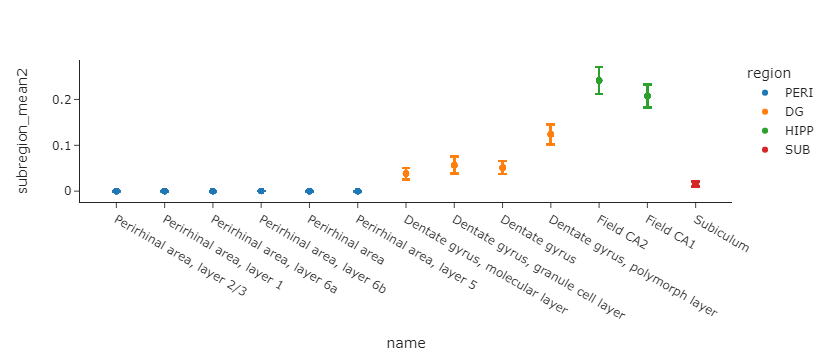

In [45]:
fig5 = px.scatter(structure_unionizes4, x="name", y="subregion_mean2", color="region", template="simple_white",
                 error_y = "subregion_sem2")
fig5.show()

In [46]:
structure_unionizes4.experiment_id = structure_unionizes4.experiment_id.astype('category')
structure_unionizes4.hemisphere_id = structure_unionizes4.hemisphere_id.astype('category')
structure_unionizes4.id = structure_unionizes4.id.astype('category')
structure_unionizes4.is_injection = structure_unionizes4.is_injection.astype('category')
structure_unionizes4.structure_id = structure_unionizes4.structure_id.astype('category')

In [47]:
corr2 = structure_unionizes4.corr()

<AxesSubplot:>

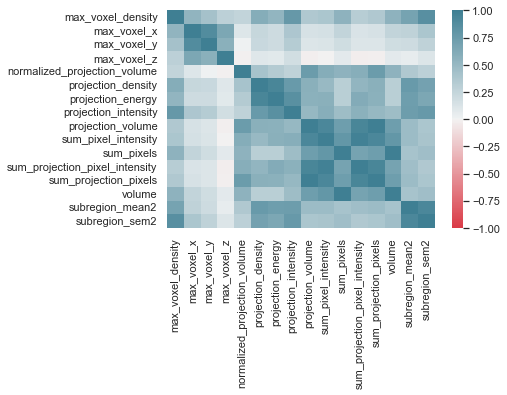

In [48]:
sns.heatmap(corr2, vmin = -1.0, vmax = 1.0, cmap = cmap)

In this case, there appeared to be a higher correlation between variables across the board.

In [49]:
REGION2 = structure_unionizes4.apply (lambda row: region2(row), axis=1)
REGION2

0      2
1      2
2      0
3      1
4      2
      ..
307    0
308    2
309    2
310    3
311    2
Length: 312, dtype: int64

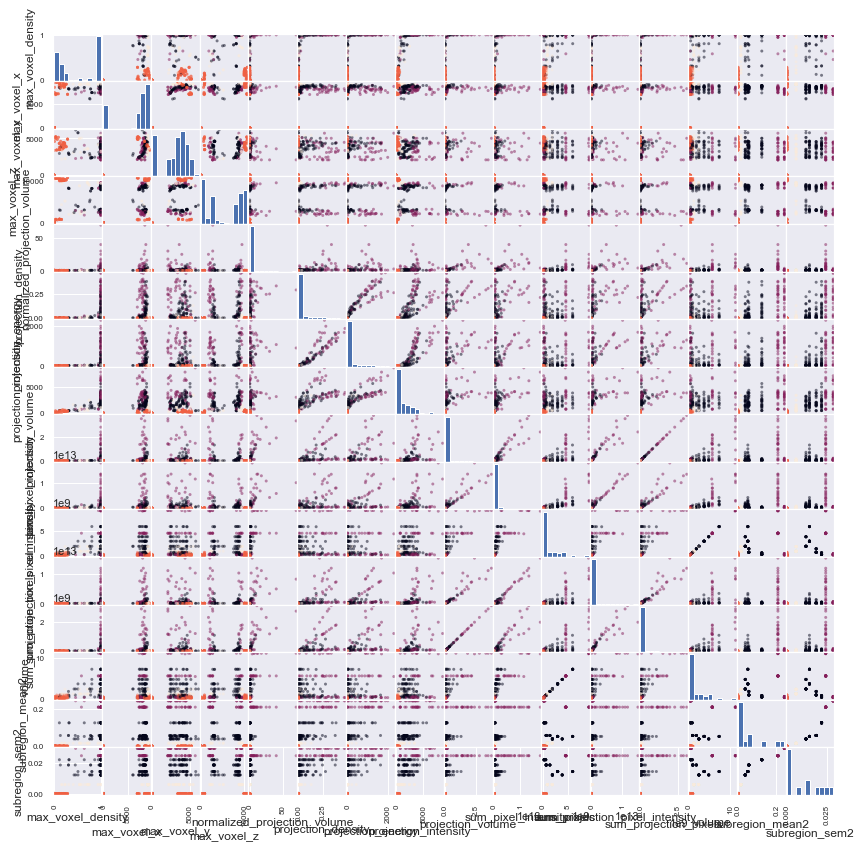

In [50]:
c = scatter_matrix(structure_unionizes4, figsize=(14, 14), c = REGION2)

Here, it initially seemed that clustering could have been present when max_voxel_y was plotted against projection_intensity. This was further explored.

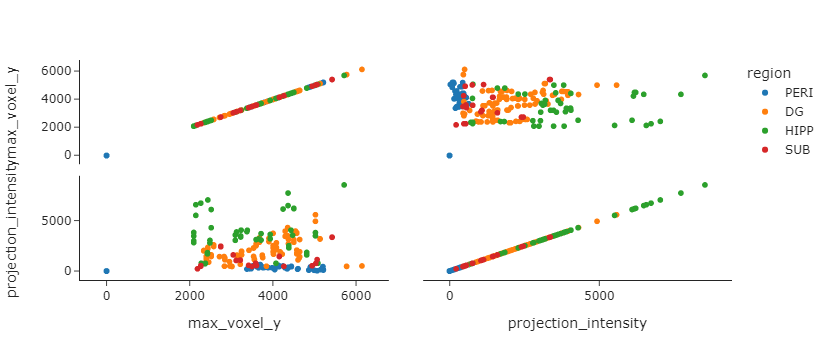

In [51]:
fig6 = px.scatter_matrix(structure_unionizes4, dimensions=["max_voxel_y", "projection_intensity"], color="region", template="simple_white")
fig6.show()

As with the lateral entorhinal cortex injection experiments, the Field CA3 injection experiments did not yield much correlation between measurements when clustered according to region.

### 3) Additional analysis performed using the Mouse Connectivity Jupyter Notebook<sup>2</sup>

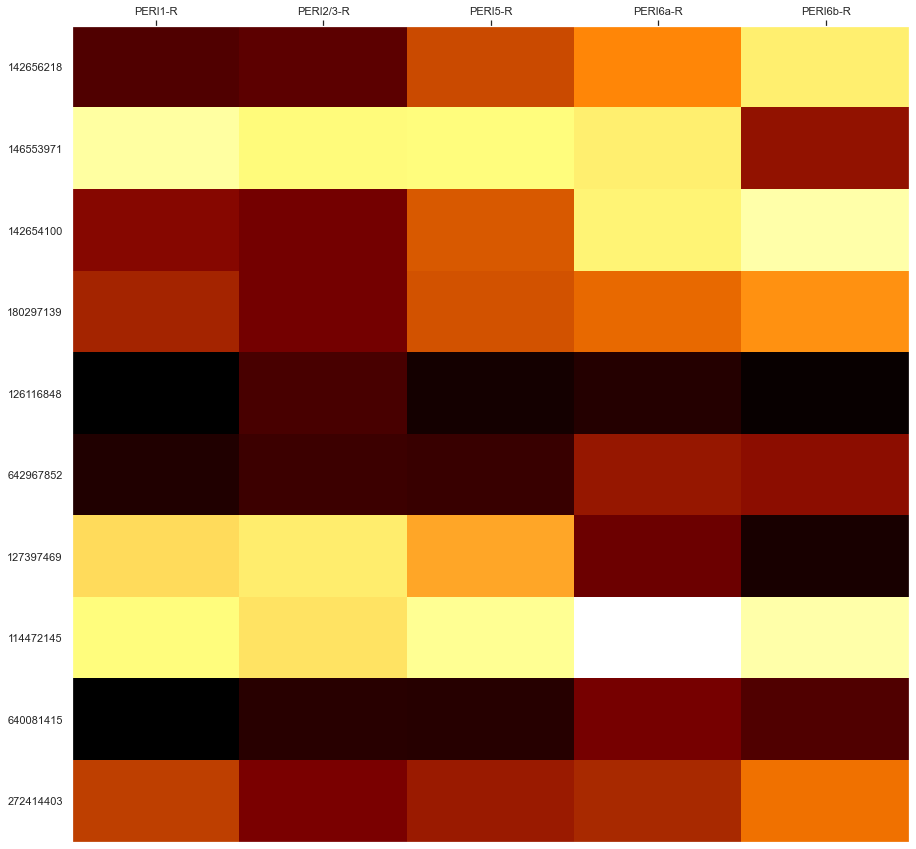

In [52]:
#*****
# A heatplot was generated to visualise projection densities in all subregions for each experiment
#in which tracer was injected into the lateral entorhinal cortex.

import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

entl_experiment_ids = [ e['id'] for e in entl_experiments ]
aoi_children = structure_tree.child_ids( [perirhinal_area['id']])[0]

pm = mcc.get_projection_matrix(experiment_ids = entl_experiment_ids, 
                               projection_structure_ids = aoi_children,
                               hemisphere_ids= [2],
                               parameter = 'projection_density')

row_labels = pm['rows'] 
column_labels = [ c['label'] for c in pm['columns'] ] 
matrix = pm['matrix']

fig, ax = plt.subplots(figsize=(15,15))
heatmap = ax.pcolor(matrix, cmap=plt.cm.afmhot)

ax.set_xticks(np.arange(matrix.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(matrix.shape[0])+0.5, minor=False)

ax.set_xlim([0, matrix.shape[1]])
ax.set_ylim([0, matrix.shape[0]])          

ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)
plt.show()

(References: numpy<sup>6</sup>; matplotlib<sup>7</sup>)

This only appears to yield projection densities in subregions of the perirhinal cortex. This may be because projection densities in the other regions were too low to visualise using the same scale used here.

In [53]:
#*****
#One experiment was chosen in which an appropriate gradient could be seen across perirhinal subregions (indicative of 
#an effect of distance from injection site on projection density).

experiment_id = 142656218 

In [54]:
#*****
pd, pd_info = mcc.get_projection_density(experiment_id)

ind, ind_info = mcc.get_injection_density(experiment_id)

inf, inf_info = mcc.get_injection_fraction(experiment_id)

dm, dm_info = mcc.get_data_mask(experiment_id)

template, template_info = mcc.get_template_volume()
annot, annot_info = mcc.get_annotation_volume()

# Binary mask obtained for perirhinal cortex.
perirhinal_mask, cm_info = mcc.get_structure_mask(922)

print(pd_info)
print(pd.shape, template.shape, annot.shape)

OrderedDict([('type', 'double'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([528, 320, 456])), ('space directions', array([[25.,  0.,  0.],
       [ 0., 25.,  0.],
       [ 0.,  0., 25.]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'gzip'), ('space origin', array([0., 0., 0.]))])
(528, 320, 456) (528, 320, 456) (528, 320, 456)


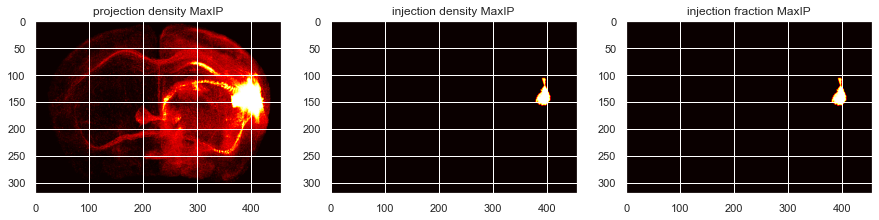

In [55]:
#*****
#The below code yields a plot of projection density across the mouse brain for the specified experiment.

pd_mip = pd.max(axis=0)
ind_mip = ind.max(axis=0)
inf_mip = inf.max(axis=0)

f, pr_axes = plt.subplots(1, 3, figsize=(15, 6))

pr_axes[0].imshow(pd_mip, cmap='hot', aspect='equal')
pr_axes[0].set_title("projection density MaxIP")

pr_axes[1].imshow(ind_mip, cmap='hot', aspect='equal')
pr_axes[1].set_title("injection density MaxIP")

pr_axes[2].imshow(inf_mip, cmap='hot', aspect='equal')
pr_axes[2].set_title("injection fraction MaxIP")

plt.show()

This plot nicely illustrates projection densities yielded from injections into the lateral entorhinal cortex in the right hemisphere. Note the particularly high projection densities around the injection site. The hippocampus can be seen as  the yellow curve in 'projection density MaxIP' at 300, 75. The perirhinal cortex is present just above the site of injection, at ~400, 100.

### References

<sup>1</sup> Oh SW, Harris JA, Ng L, Winslow B, Cain N, Mihalas S, et al. A mesoscale connectome of the mouse brain. Nature. 2014 Apr 10;508(7495):207–14.

<sup>2</sup> AllenSDK: code for reading and processing Allen Institute for Brain Science data [Internet]. Github; [cited 2022 Jan 9]. Available from: https://github.com/AllenInstitute/AllenSDK

(Link to the Mouse Connectivity Jupyter notebook: https://alleninstitute.github.io/AllenSDK/_static/examples/nb/mouse_connectivity.html)

<sup>3</sup> McKinney W. pandas: a Foundational Python Library for Data Analysis and Statistics. 2011 [cited 2022 Jan 8]; Available from: https://www.semanticscholar.org/paper/1a62eb61b2663f8135347171e30cb9dc0a8931b5

<sup>4</sup> Waskom M. seaborn: statistical data visualization. J Open Source Softw. 2021 Apr 6;6(60):3021.

<sup>5</sup> Collaborative data science [Internet]. Plotly Technologies Inc; [cited 2022 Jan 9]. Available from: https://plot.ly.

<sup>6</sup> Harris CR, Millman KJ, van der Walt SJ, Gommers R, Virtanen P, Cournapeau D, et al. Array programming with NumPy. Nature. 2020 Sep;585(7825):357–62.

<sup>7</sup> Hunter JD. Matplotlib: A 2D Graphics Environment. Computing in Science Engineering. 2007 May;9(3):90–5.